# utils
- split_train_test(df) \
    sc 데이터 프레임 변환 
    
    
- fit_sampler(X_train, y_train, sampler='SMOTE') \
    샘플러 선택
    
    
- ut.fit_cv(X_train_over, y_train_over, X_test, y_test) \
    학습과 결과

In [1]:
import utils as ut

In [2]:
df = pd.read_csv('../datas/fraud_detect_data_encoded.csv')
df.shape

(16000, 25)

# Use case
socar_preprocessing-seunghwan의 **16번째 방법**에 적용 \
(null삭제, 원핫인코딩, smote, Robust)

# --1

### (1) NULL 데이터 삭제, (2) 원핫인코딩 적용, (3) 데이터 분리, (4) SMOTE

In [3]:
# null 삭제
socar_delete = df.drop(['c_16', 'c_21', 'c_22', 'c_23', 'c_24'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['c_1', 'c_4', 'c_15', 'c_25'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='SMOTE')

==Split Result==
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12845, 34]]
y_train_over : [[0, 1], [12845, 12845]]


### (5) RobustScaler, (6) 학습 (scoring = 'recall')

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


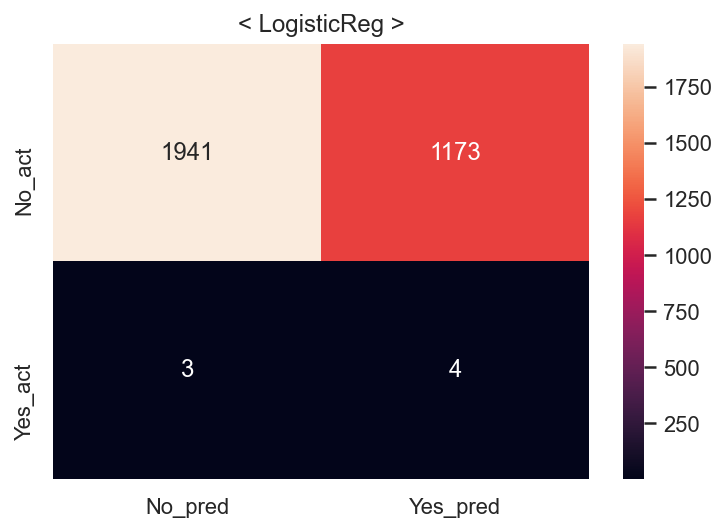

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


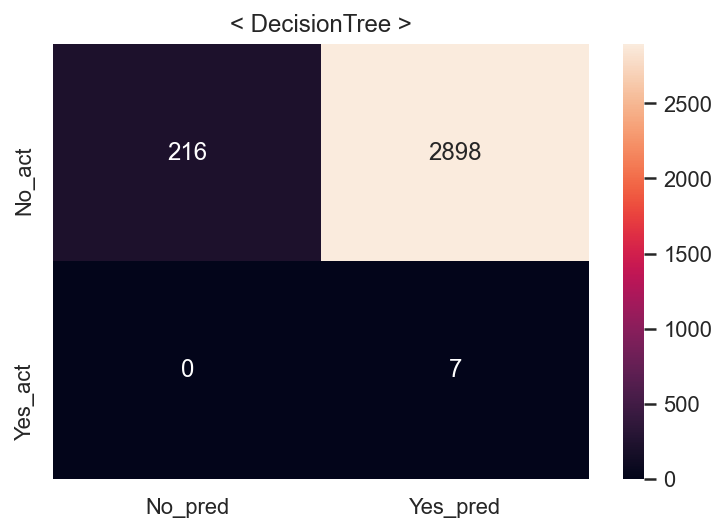

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.3s
====Done Evaluation====
====Done Evaluation====


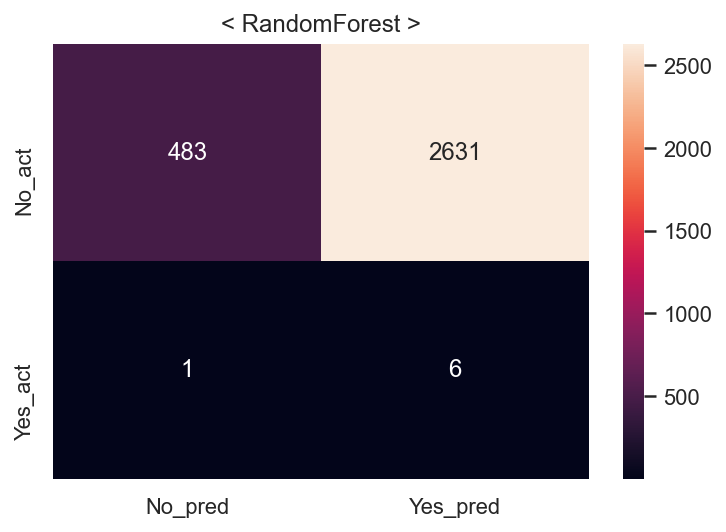

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


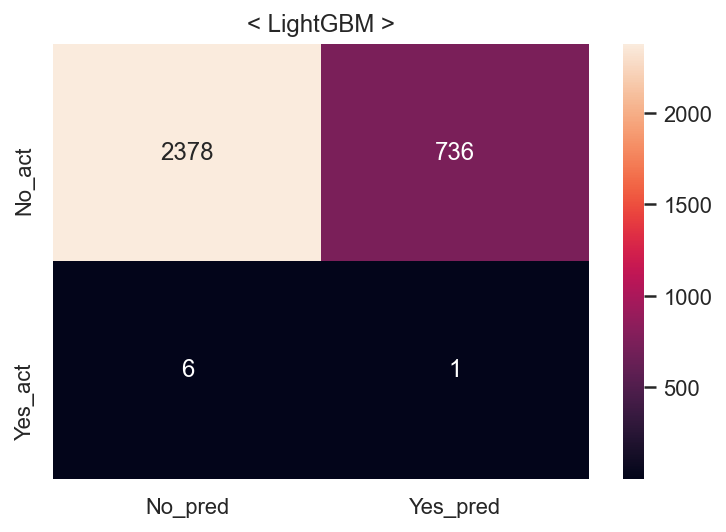

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   3.4s
====Done Evaluation====
====Done Evaluation====


/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


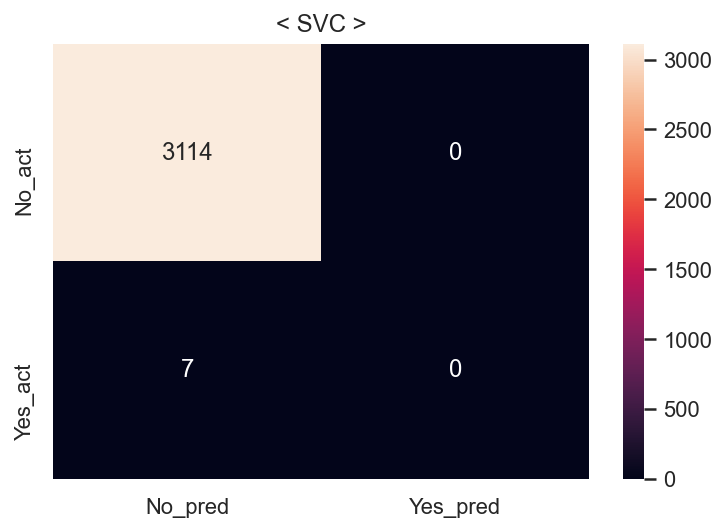

Fit time : 2.2 min


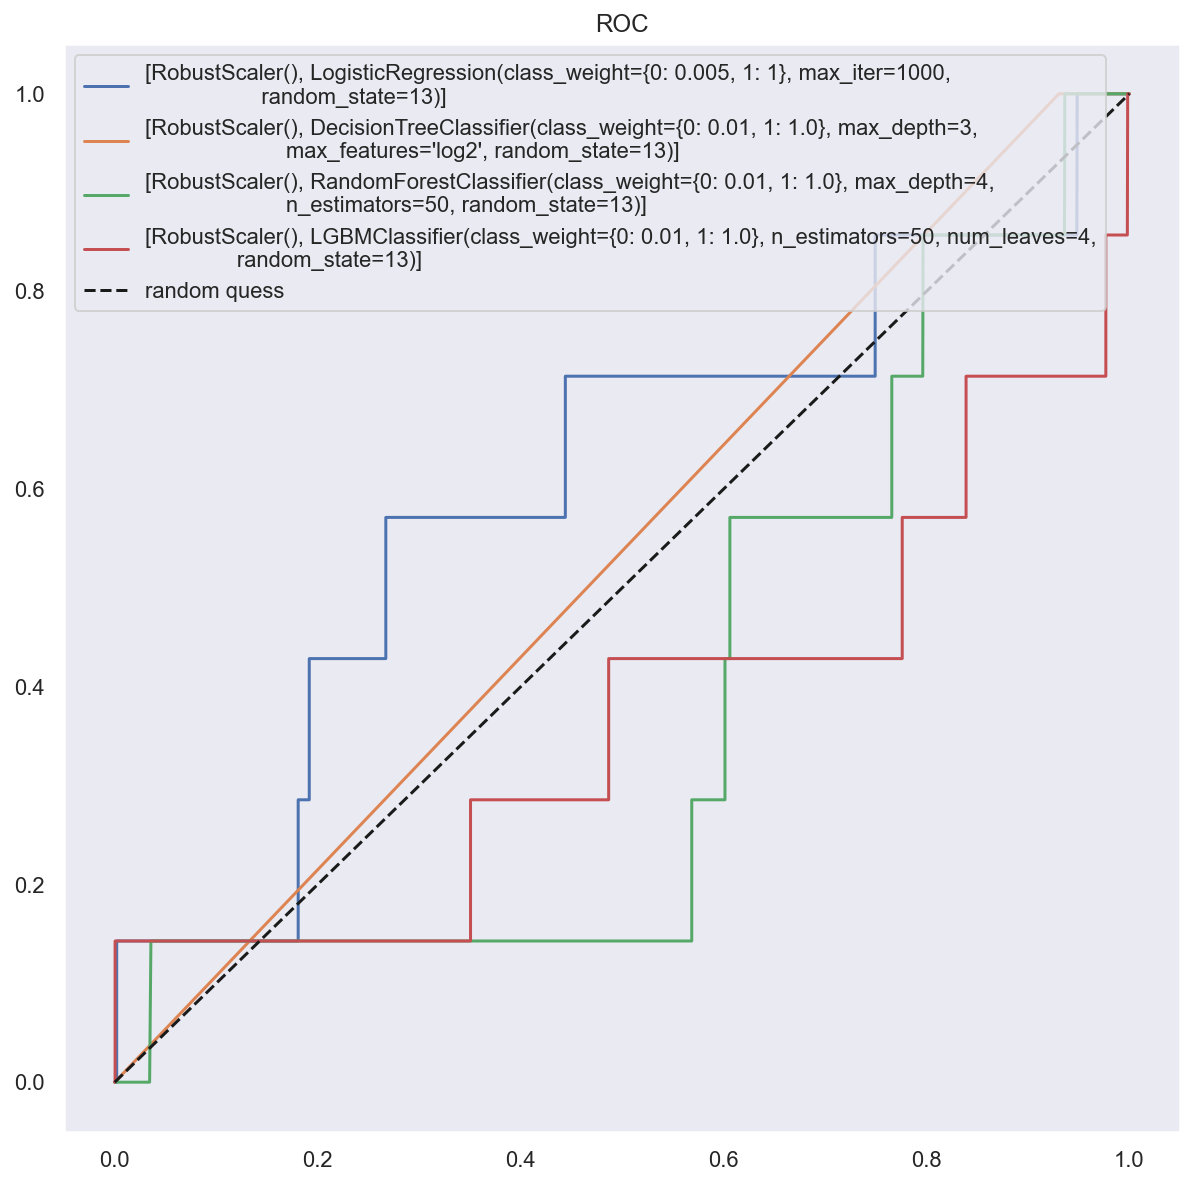

([Pipeline(steps=[('scaler', RobustScaler()),
                  ('clf',
                   LogisticRegression(class_weight={0: 0.005, 1: 1},
                                      max_iter=1000, random_state=13))],
           verbose=True),
  Pipeline(steps=[('scaler', RobustScaler()),
                  ('clf',
                   DecisionTreeClassifier(class_weight={0: 0.01, 1: 1.0},
                                          max_depth=3, max_features='log2',
                                          random_state=13))],
           verbose=True),
  Pipeline(steps=[('scaler', RobustScaler()),
                  ('clf',
                   RandomForestClassifier(class_weight={0: 0.01, 1: 1.0},
                                          max_depth=4, n_estimators=50,
                                          random_state=13))],
           verbose=True),
  Pipeline(steps=[('scaler', RobustScaler()),
                  ('clf',
                   LGBMClassifier(class_weight={0: 0.01, 1: 1.0}, n_esti

In [4]:
import utils as ut


ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB', scoring='recall')

# --2

### 같은 케이스로 parameter에 c 값을 넣어서 cv 해봄
큰 차이가 없다

In [5]:
ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB', scoring='f1')

=> confusion matrix
[[12845     0]
 [   34 12811]]
   accuracy  precision    recall        f1   roc_auc
0  0.998677        1.0  0.997353  0.998675  0.998677
====Done Evaluation====
=> confusion matrix
[[3114    0]
 [   7    0]]
   accuracy  precision  recall   f1  roc_auc
0  0.997757        0.0     0.0  0.0      0.5
====Done Evaluation====
##

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


=> confusion matrix
[[12845     0]
 [   12 12833]]
   accuracy  precision    recall        f1   roc_auc
0  0.999533        1.0  0.999066  0.999533  0.999533
====Done Evaluation====
=> confusion matrix
[[3103   11]
 [   7    0]]
   accuracy  precision  recall   f1   roc_auc
0  0.994233        0.0     0.0  0.0  0.498234
====Done Evaluation====
##=> confusion matrix
[[12843     2]
 [   13 12832]]
   accuracy  precision    recall        f1   roc_auc
0  0.999416   0.999844  0.998988  0.999416  0.999416
====Done Evaluation====
=> confusion matrix
[[3111    3]
 [   7    0]]
   accuracy  precision  recall   f1   roc_auc
0  0.996796        0.0     0.0  0.0  0.499518
====Done Evaluation====
##=> confusion matrix
[[12845     0]
 [   34 12811]]
   accuracy  precision    recall        f1   roc_auc
0  0.998677        1.0  0.997353  0.998675  0.998677
====Done Evaluation====
=> confusion matrix
[[3114    0]
 [   7    0]]
   accuracy  precision  recall   f1  roc_auc
0  0.997757        0.0     0.0  0.0

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


=> confusion matrix
[[12845     0]
 [   33 12812]]
   accuracy  precision    recall        f1   roc_auc
0  0.998715        1.0  0.997431  0.998714  0.998715
====Done Evaluation====
=> confusion matrix
[[3114    0]
 [   7    0]]
   accuracy  precision  recall   f1  roc_auc
0  0.997757        0.0     0.0  0.0      0.5
====Done Evaluation====
##Fit time : 826.2700021266937


/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,LogisticReg,0.998677,1.000000,0.997353,0.998675,0.998677,0.997757,0.0,0.0,0.0,0.500000
1,DecisionTree,0.999533,1.000000,0.999066,0.999533,0.999533,0.994233,0.0,0.0,0.0,0.498234
2,RandomForest,0.999416,0.999844,0.998988,0.999416,0.999416,0.996796,0.0,0.0,0.0,0.499518
3,LightGBM,0.998677,1.000000,0.997353,0.998675,0.998677,0.997757,0.0,0.0,0.0,0.500000
4,SVC,0.998715,1.000000,0.997431,0.998714,0.998715,0.997757,0.0,0.0,0.0,0.500000


# --3 

### 같은 케이스로 borderlineSMOTE 사용

### (1) NULL 데이터 삭제, (2) 원핫인코딩 적용, (3) 데이터 분리, (4) BorderlineSMOTE

In [3]:
# null 삭제
df_do_dn = df_do.drop(['c_15', 'c_16', 'c_21', 'c_22', 'c_23', 'c_24'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['c_1', 'c_4', 'c_15', 'c_25'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')

==Split Result==
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12845, 34]]
y_train_over : [[0, 1], [12845, 12845]]


In [4]:
# matrix와 점수 안보겠습니다
ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB', scoring='recall', conf_m=False, view_scores=False)

====Done Evaluation====
====Done Evaluation====
##

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


====Done Evaluation====
====Done Evaluation====
##====Done Evaluation====
====Done Evaluation====
##====Done Evaluation====
====Done Evaluation====
##====Done Evaluation====
====Done Evaluation====
##Fit time : 551.0


,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,LogisticReg,0.998677,1.000000,0.997353,0.998675,0.998677,0.997757,0.000000,0.000000,0.000000,0.500000
1,DecisionTree,0.813896,0.729065,0.999066,0.842973,0.813896,0.442807,0.003440,0.857143,0.006853,0.649509
2,RandomForest,0.725496,0.645707,0.999299,0.784501,0.725496,0.204422,0.002811,1.000000,0.005607,0.601317
3,LightGBM,0.904321,0.840267,0.998443,0.912552,0.904321,0.759052,0.005312,0.571429,0.010526,0.665451
4,SVC,0.564928,0.534721,0.999922,0.696813,0.564928,0.129766,0.002205,0.857143,0.004399,0.492637


# --4
### ADASYN 사용

### (1) NULL 데이터 삭제, (2) 원핫인코딩 적용, (3) 데이터 분리, (4) ADASYN

In [3]:
# null 삭제
df_do_dn = df_do.drop(['c_15', 'c_16', 'c_21', 'c_22', 'c_23', 'c_24'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['c_1', 'c_4', 'c_15', 'c_25'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='ADASYN')

==Split Result==
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12845, 34]]
y_train_over : [[0, 1], [12845, 12841]]


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................................clf__penalty=l2; total time=   0.2s
[CV] END ....................................clf__penalty=l2; total time=   0.2s
[CV] END ....................................clf__penalty=l2; total time=   0.2s
[CV] END ....................................clf__penalty=l2; total time=   0.2s
[CV] END ....................................clf__penalty=l2; total time=   0.2s
====Done Evaluation====
====Done Evaluation====
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ................................clf__max_depth=None; total time=   0.1s
[CV] END ................................clf__max_depth=None; total time=   0.1s
[CV] END ................................clf__max_depth=None; total time=   0.1s


/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ................................clf__max_depth=None; total time=   0.1s
[CV] END ................................clf__max_depth=None; total time=   0.1s
[CV] END ...................................clf__max_depth=2; total time=   0.0s
[CV] END ...................................clf__max_depth=2; total time=   0.0s
[CV] END ...................................clf__max_depth=2; total time=   0.0s
[CV] END ...................................clf__max_depth=2; total time=   0.0s
[CV] END ...................................clf__max_depth=2; total time=   0.0s
[CV] END ...................................clf__max_depth=3; total time=   0.0s
[CV] END ...................................clf__max_depth=3; total time=   0.0s
[CV] END ...................................clf__max_depth=3; total time=   0.0s
[CV] END ...................................clf__max_depth=3; total time=   0.0s
[CV] END ...................................clf__max_depth=3; total time=   0.0s
[CV] END ...................

[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipel

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipel

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipel

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Pipeline] ............... (step 2 of 2) Processing clf, total=  19.9s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  18.2s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  18.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  19.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  18.4s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  29.3s
====Done Evaluation====
====Done Evaluation====
Fit time : 3.04 min


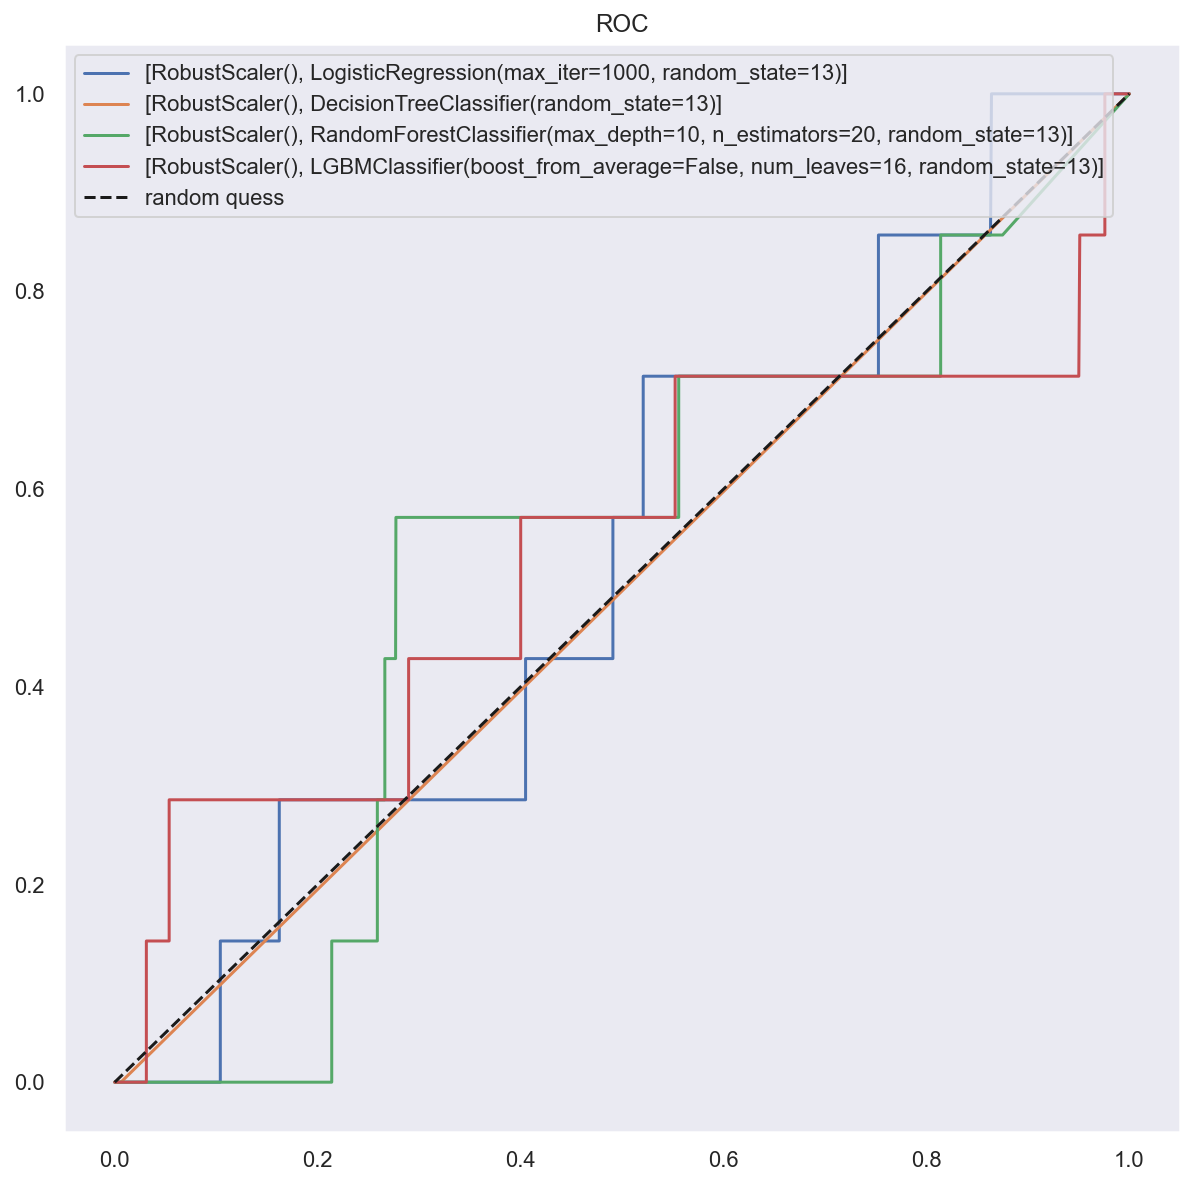

In [4]:
cv_list = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB', scoring='recall', conf_m=False, view_scores=False)

### cv_list 를 return 값으로 줘서 활용 가능하게 만들자

In [8]:
cv_list[3]

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('clf',
                                        LGBMClassifier(boost_from_average=False,
                                                       random_state=13))],
                                verbose=True),
             param_grid=[{'clf__n_estimators': [10, 30, 50, 100],
                          'clf__num_leaves': [4, 8, 16]}],
             scoring='recall')

# 히트맵 반영 버전 예시

In [1]:
import utils as ut

In [2]:
df = pd.read_csv("../datas/fraud_detect_data_encoded.csv")
df.shape

(16000, 25)

In [4]:
# null 삭제
df_do_dn = df_do.drop(['c_15', 'c_16', 'c_21', 'c_22', 'c_23', 'c_24'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['c_1', 'c_4', 'c_15', 'c_25'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling to SMOTE (default)
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')

==Split Result==
y_train :  [[0, 1], [12845, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12845, 34]]
y_train_over : [[0, 1], [12845, 12845]]


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.3s
====Done Evaluation====
====Done Evaluation====


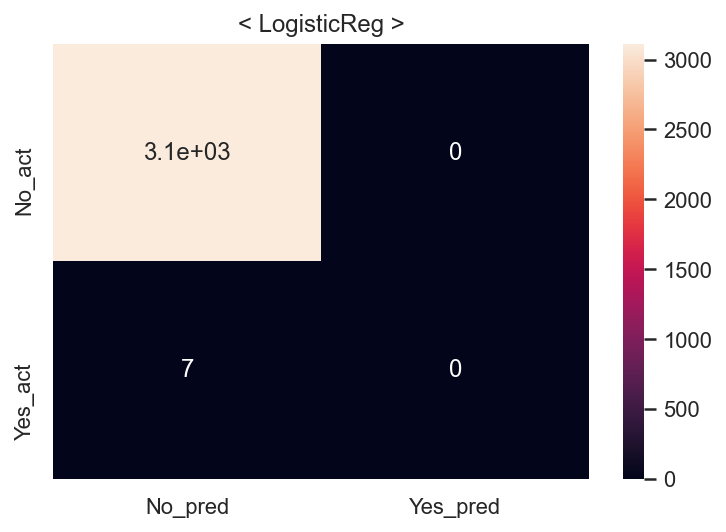

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


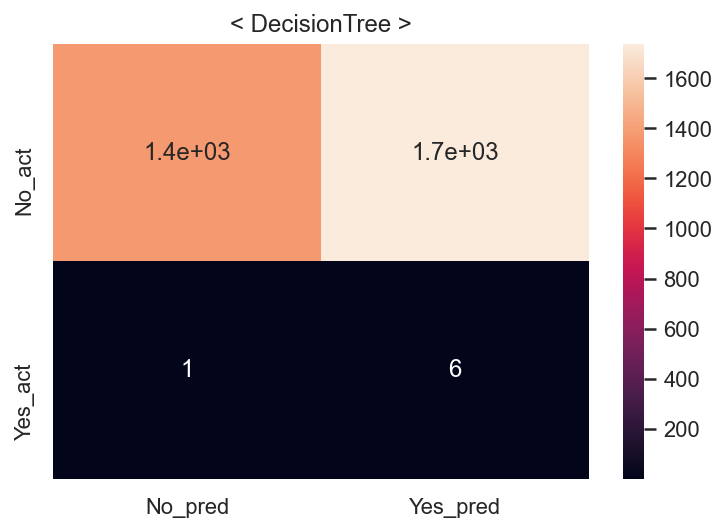

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


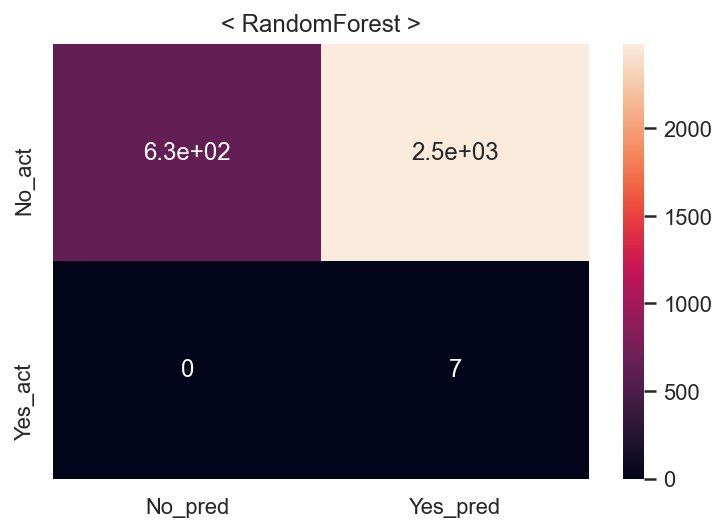

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


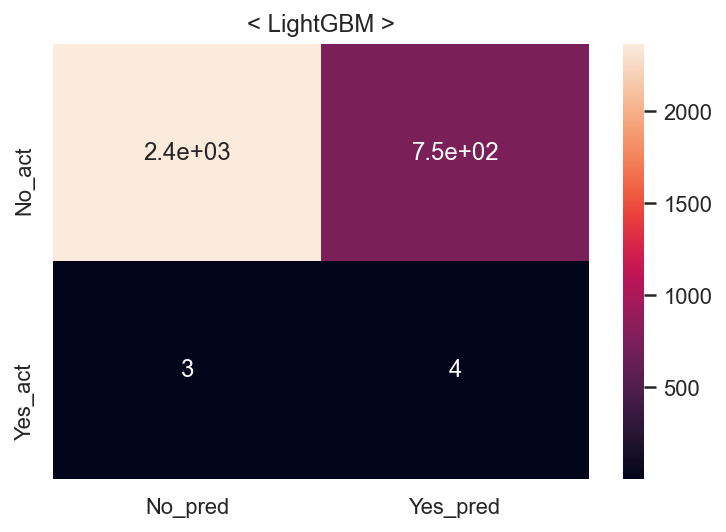

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


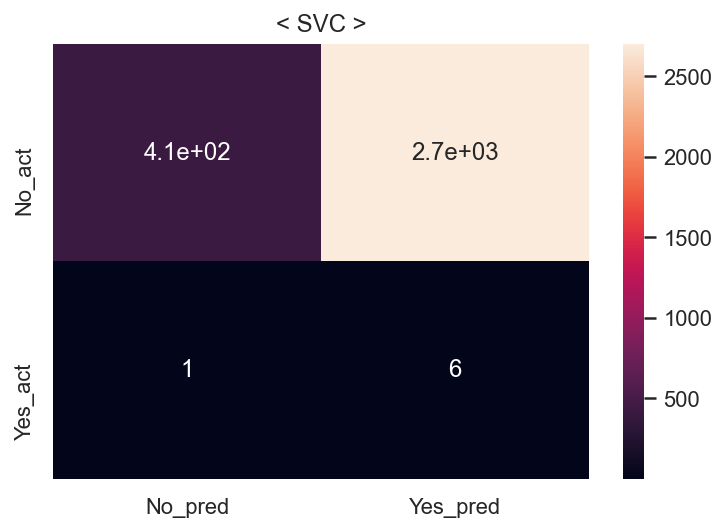

Fit time : 2.03 min


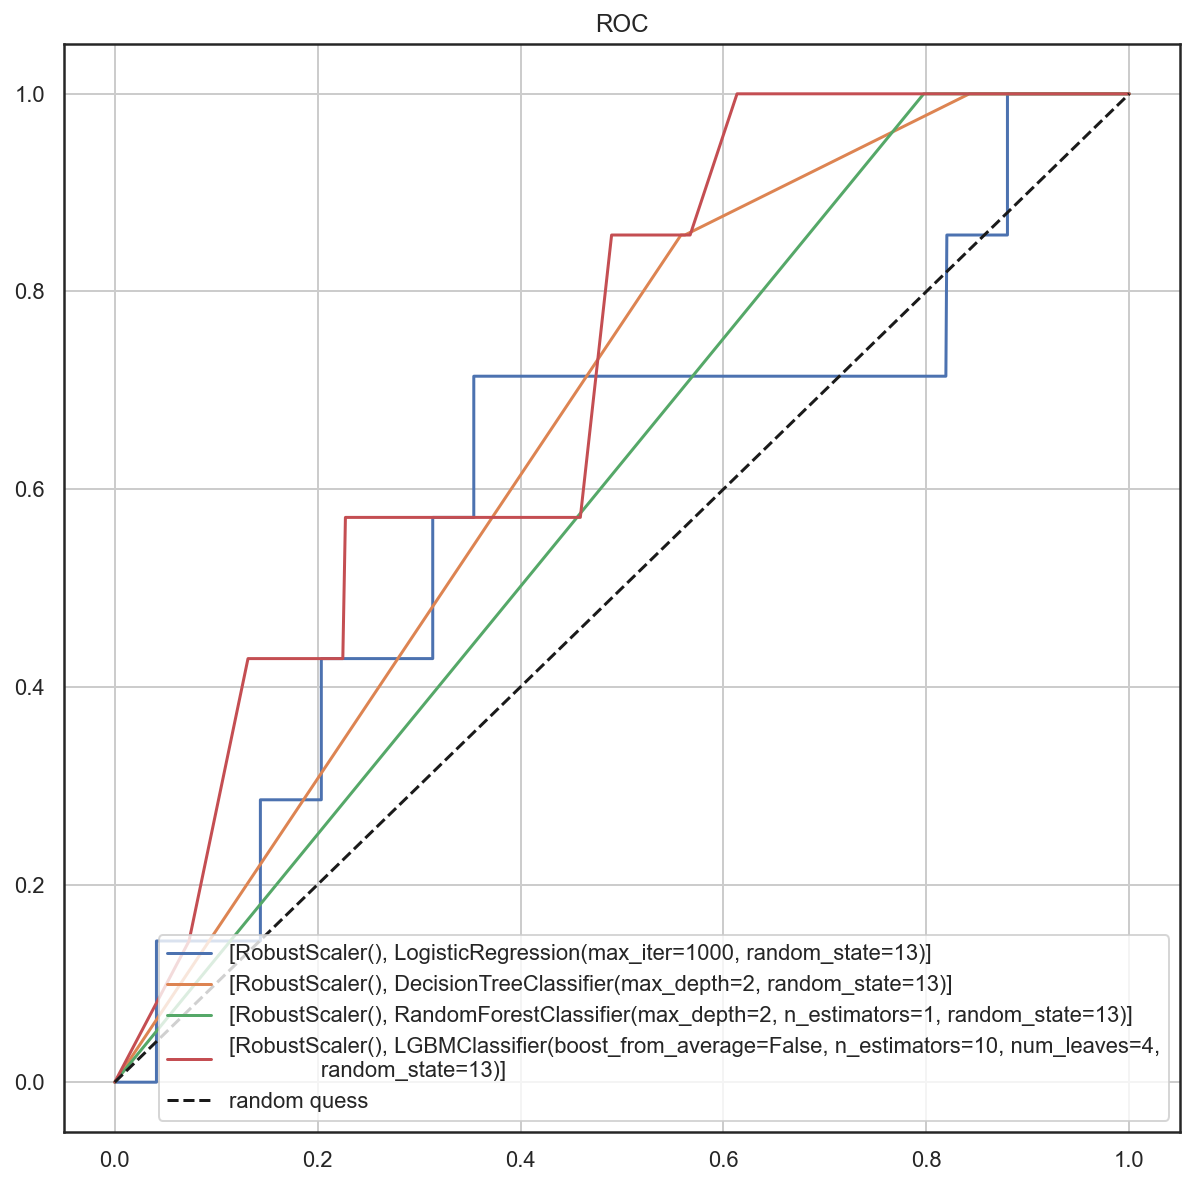

CPU times: user 1min 5s, sys: 971 ms, total: 1min 6s
Wall time: 2min 2s


In [5]:
%%time
cv_list, result_df = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB',
             scoring='recall', conf_m=False, view_scores=False, n_jobs=-1)

In [6]:
result_df_cp = result_df.copy()
result_df_cp

,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,LogisticReg,0.998677,1.000000,0.997353,0.998675,0.998677,0.997757,0.000000,0.000000,0.000000,0.500000
1,DecisionTree,0.813896,0.729065,0.999066,0.842973,0.813896,0.442807,0.003440,0.857143,0.006853,0.649509
2,RandomForest,0.725496,0.645707,0.999299,0.784501,0.725496,0.204422,0.002811,1.000000,0.005607,0.601317
3,LightGBM,0.904321,0.840267,0.998443,0.912552,0.904321,0.759052,0.005312,0.571429,0.010526,0.665451
4,SVC,0.567030,0.535926,0.999922,0.697835,0.567030,0.134572,0.002217,0.857143,0.004423,0.495045


In [7]:
result_df_cp["null_del"] = [0]  * len(result_df_cp)
result_df_cp["encoded"] = [0]  * len(result_df_cp)
result_df_cp["scaler"] = ["RB"]  * len(result_df_cp)
result_df_cp["sampler"] = ["BdSMOTE"]  * len(result_df_cp)
result_df_cp = result_df_cp[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df_cp

,null_del,encoded,scaler,sampler,classifier,train accuracy,train precision,train recall,train f1,train auc,test accuracy,test precision,test recall,test f1,test auc
0,0,0,RB,BdSMOTE,LogisticReg,0.998677,1.000000,0.997353,0.998675,0.998677,0.997757,0.000000,0.000000,0.000000,0.500000
1,0,0,RB,BdSMOTE,DecisionTree,0.813896,0.729065,0.999066,0.842973,0.813896,0.442807,0.003440,0.857143,0.006853,0.649509
2,0,0,RB,BdSMOTE,RandomForest,0.725496,0.645707,0.999299,0.784501,0.725496,0.204422,0.002811,1.000000,0.005607,0.601317
3,0,0,RB,BdSMOTE,LightGBM,0.904321,0.840267,0.998443,0.912552,0.904321,0.759052,0.005312,0.571429,0.010526,0.665451
4,0,0,RB,BdSMOTE,SVC,0.567030,0.535926,0.999922,0.697835,0.567030,0.134572,0.002217,0.857143,0.004423,0.495045
